<a href="https://colab.research.google.com/github/yeyomuri/fundamentos_redes_neuronales_con_Python_y_Keras/blob/main/clasificacion_multiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Clasificación de noticias


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras import layers, models
from keras.datasets import reuters



In [3]:
(train_data, train_labels), (test_data, test_label) = reuters.load_data(num_words = 10000)

2121728/2110848 [==============================] - 0s 0us/step


In [4]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [10]:
word_index = reuters.get_word_index()
word_index = dict([(value, key)for(key, value)in word_index.items()])
for _ in train_data[0]:
  print(word_index.get(_-3))

None
None
None
said
as
a
result
of
its
december
acquisition
of
space
co
it
expects
earnings
per
share
in
1987
of
1
15
to
1
30
dlrs
per
share
up
from
70
cts
in
1986
the
company
said
pretax
net
should
rise
to
nine
to
10
mln
dlrs
from
six
mln
dlrs
in
1986
and
rental
operation
revenues
to
19
to
22
mln
dlrs
from
12
5
mln
dlrs
it
said
cash
flow
per
share
this
year
should
be
2
50
to
three
dlrs
reuter
3


In [11]:
def vectorizar(sequences, dim=10000):
  results = np.zeros((len(sequences), dim))
  for i, sequences in enumerate (sequences):
    results[i, sequences] = 1
    return results

In [12]:
x_train = vectorizar(train_data)
x_test = vectorizar(test_data)

#Crear estructura de tensor

In [15]:
from tensorflow.keras.utils import to_categorical

In [17]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_label)

In [18]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

##Creación de las capas 

In [20]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [22]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [23]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

##Entrenamiento del model de clasificación multiple

In [27]:
history = model.fit(partial_x_train, partial_y_train, epochs = 30, batch_size = 512, validation_data = (x_val, y_val))

Epoch 1/30
16/16 [==============================] - 0s 22ms/step - loss: 3.2692 - accuracy: 0.3514 - val_loss: 3.2614 - val_accuracy: 0.3530
Epoch 2/30
16/16 [==============================] - 0s 19ms/step - loss: 3.2536 - accuracy: 0.3514 - val_loss: 3.2459 - val_accuracy: 0.3530
Epoch 3/30
16/16 [==============================] - 0s 18ms/step - loss: 3.2382 - accuracy: 0.3514 - val_loss: 3.2305 - val_accuracy: 0.3530
Epoch 4/30
16/16 [==============================] - 0s 19ms/step - loss: 3.2230 - accuracy: 0.3514 - val_loss: 3.2153 - val_accuracy: 0.3530
Epoch 5/30
16/16 [==============================] - 0s 18ms/step - loss: 3.2081 - accuracy: 0.3514 - val_loss: 3.2004 - val_accuracy: 0.3530
Epoch 6/30
16/16 [==============================] - 0s 20ms/step - loss: 3.1933 - accuracy: 0.3514 - val_loss: 3.1856 - val_accuracy: 0.3530
Epoch 7/30
16/16 [==============================] - 0s 18ms/step - loss: 3.1785 - accuracy: 0.3514 - val_loss: 3.1707 - val_accuracy: 0.3530
Epoch 8/30
16

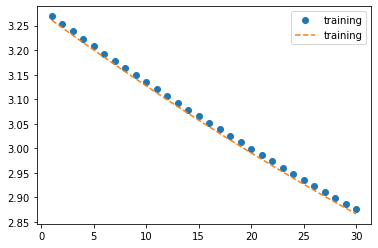

In [28]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epoch = range(1, len(loss_values)+1)
plt.plot(epoch, loss_values, 'o', label = 'training')
plt.plot(epoch, val_loss_values, '--', label = 'training')
plt.legend()
plt.show()

In [30]:
model.evaluate(x_test, y_test)

71/71 [==============================] - 1s 7ms/step - loss: 2.8798 - accuracy: 0.3620


[2.879810094833374, 0.36197686195373535]